In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# if __name__ == "__main__":

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from yellowbrick.model_selection import FeatureImportances
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
import utils_exploratory as ue
import utils_modelling as um

In [3]:
df_previous = ue.df_csv("air_system_previous_years.csv" )

In [7]:
df_previous = ue.exchange_dtypes_NaN(df_previous)


DataFrame após a conversão:
       class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          0   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1          0   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2          0   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3          0      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4          0   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...      ...     ...     ...           ...     ...     ...     ...     ...   
59995      0  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996      0    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997      0     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998      0   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999      0   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_

In [5]:
df_previous = ue.classe_boll_1(df_previous)
df_previous = ue.classe_boll_0(df_previous)

In [10]:
df_previous_cleaned = um.remove_NaN(df_previous, 0.75)

Vamos preencher os dados de 3 maneiras diferentes e criar 3 dfs diferentes

In [12]:
df_previous_LR = um.fill_LR(df_previous_cleaned)
df_previous_mean = um.fill_mean(df_previous_cleaned)
df_previous_KNN = um.fill_KNN(df_previous_cleaned)

Vamos reduzir a dimensionalidade dos dataframes e depois fazer um processo iterativo de redução para contrastar os resultados

In [26]:
df_previous_LR_PCA = um.apply_pca(df_previous_LR, 20)

df_previous_mean_PCA = um.apply_pca(df_previous_mean, 20)

df_previous_KNN_PCA = um.apply_pca(df_previous_KNN, 20)

-------------------------------------------------------------------------------------------------
LR

In [58]:
X_train, X_test, y_train, y_test = um.train_test(df_previous_LR_PCA)

report, modelLR = um.fit_model_analisys(X_train, X_test, y_train, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11800
           1       0.98      0.95      0.96       200

    accuracy                           1.00     12000
   macro avg       0.99      0.97      0.98     12000
weighted avg       1.00      1.00      1.00     12000



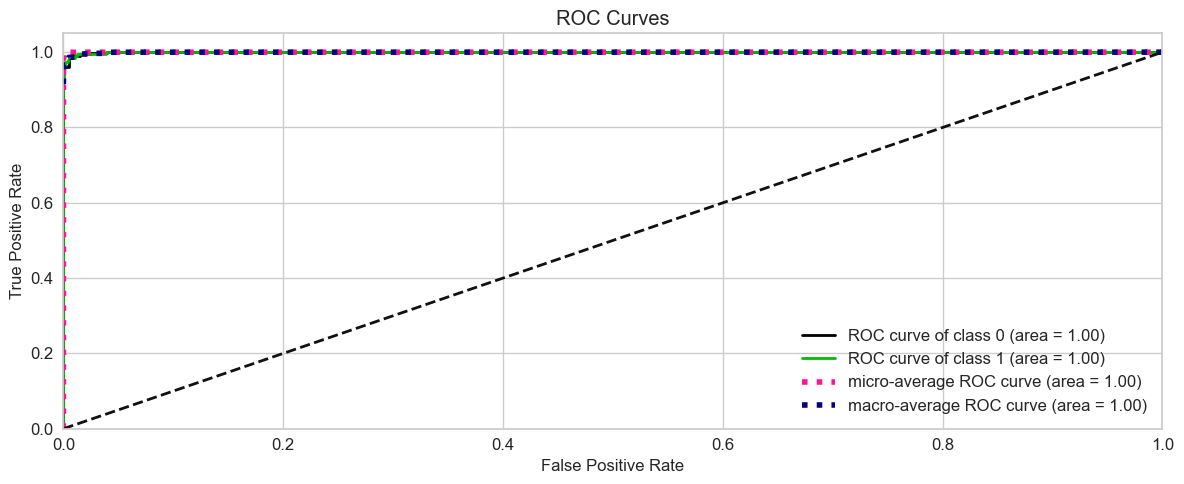

None


In [59]:
um.plt_roc_curve(modelLR, X_test, y_test)

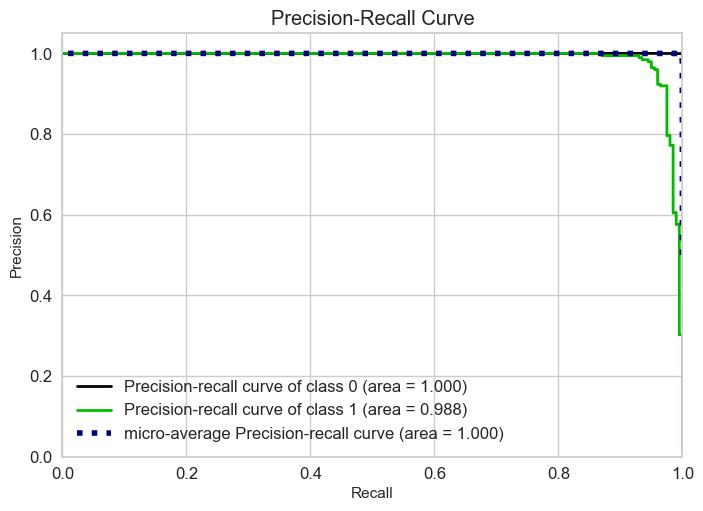

None


In [60]:
um.plt_precision_recall_curve_plot(modelLR, X_test, y_test)

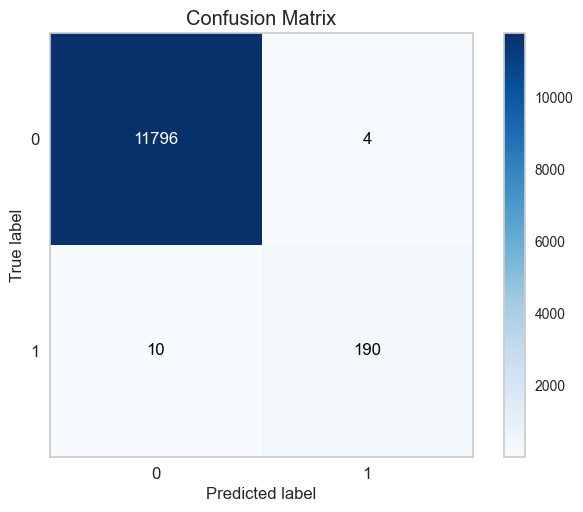

None


In [61]:
um.plot_confusion_matrix_plot(modelLR, X_test, y_test)

-----------------------------------------------------------------------------------------------------------------------------

MEAN

In [62]:
X_train, X_test, y_train, y_test = um.train_test(df_previous_mean_PCA)

report, modelMEAN = um.fit_model_analisys(X_train, X_test, y_train, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11800
           1       0.78      0.64      0.70       200

    accuracy                           0.99     12000
   macro avg       0.88      0.82      0.85     12000
weighted avg       0.99      0.99      0.99     12000



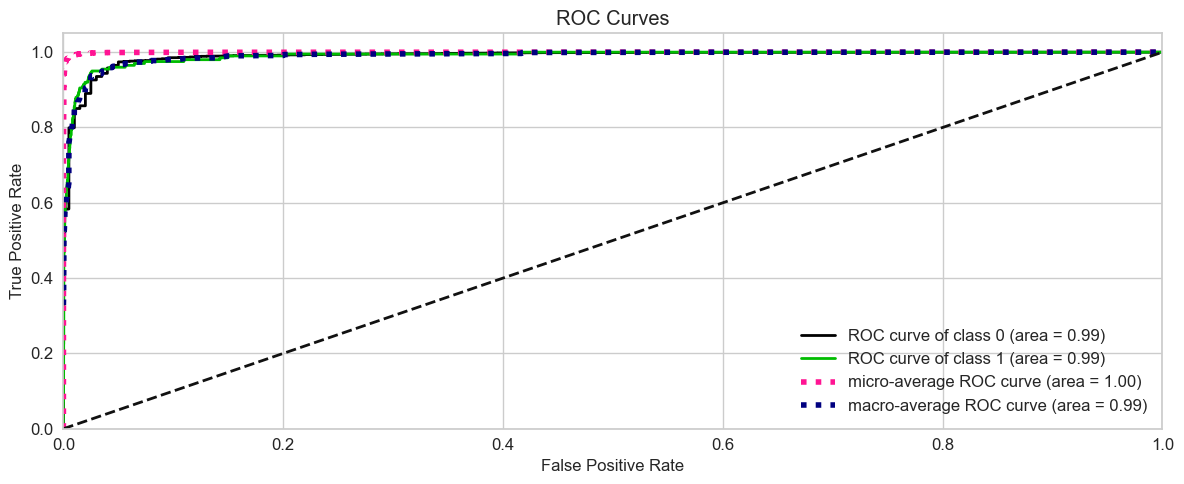

None


In [63]:
um.plt_roc_curve(modelMEAN, X_test, y_test)

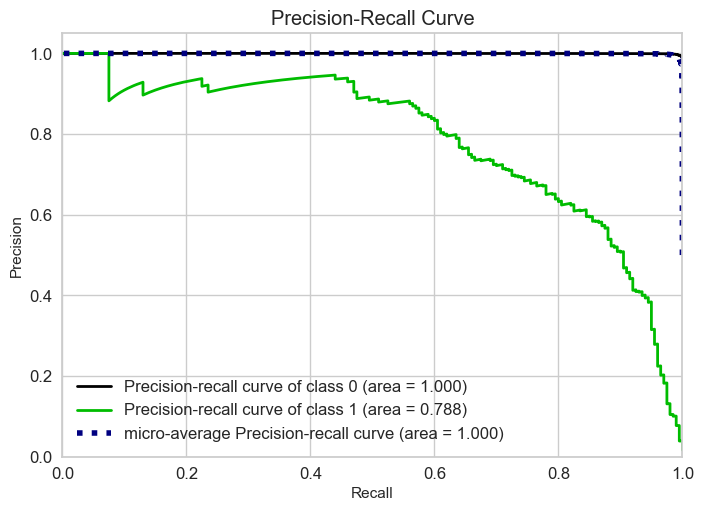

None


In [64]:
um.plt_precision_recall_curve_plot(modelMEAN, X_test, y_test)

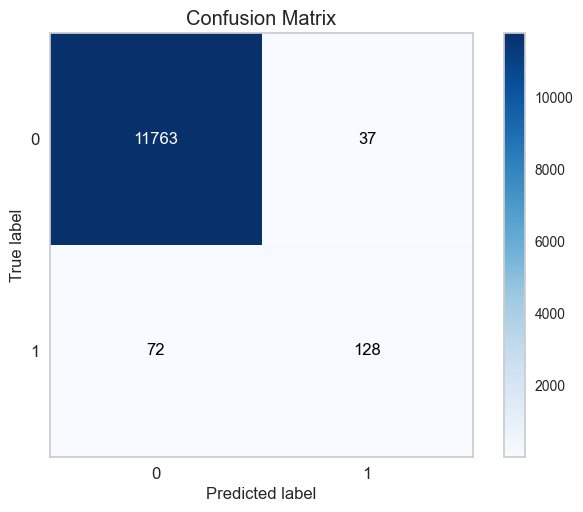

None


In [65]:
um.plot_confusion_matrix_plot(modelMEAN, X_test, y_test)

-----------------------------------------------------------------------------------------------------------------------------------------

KNN

In [66]:
X_train, X_test, y_train, y_test = um.train_test(df_previous_KNN_PCA)

report, modelKNN = um.fit_model_analisys(X_train, X_test, y_train, y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     11800
         1.0       0.79      0.62      0.70       200

    accuracy                           0.99     12000
   macro avg       0.89      0.81      0.85     12000
weighted avg       0.99      0.99      0.99     12000



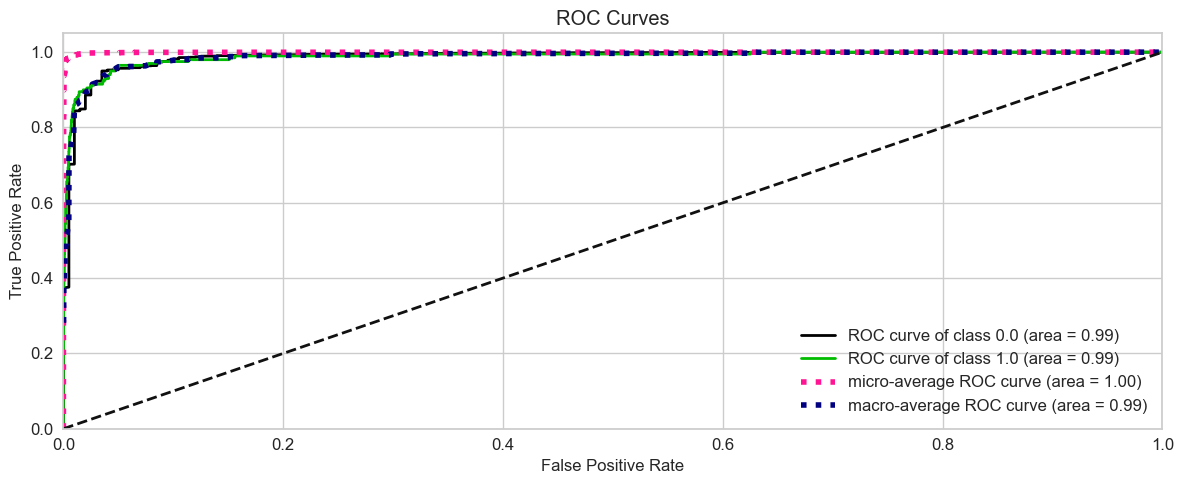

None


In [67]:
um.plt_roc_curve(modelKNN, X_test, y_test)

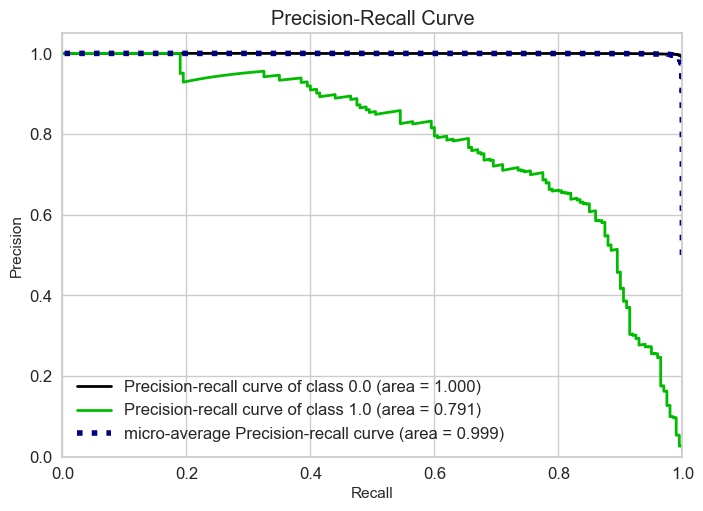

None


In [68]:
um.plt_precision_recall_curve_plot(modelKNN, X_test, y_test)

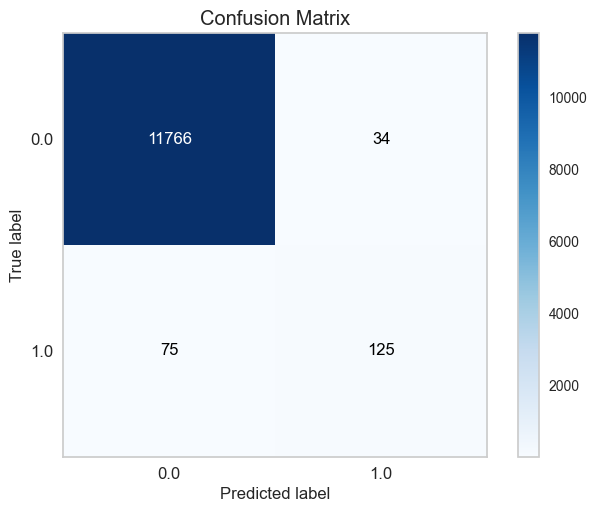

None


In [69]:
um.plot_confusion_matrix_plot(modelKNN, X_test, y_test)

In [75]:
um.saving_model(modelLR, "modelLR.joblib")
um.saving_model(modelMEAN, "modelMEAN.joblib")
um.saving_model(modelKNN, "modelKNN.joblib")


Não sera efetuado hipertunning por falta de tempo e resultados satisfatorios 